<a href="https://colab.research.google.com/github/SANIDHYA27SINGH/hack-python/blob/main/Sanidhya_water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


csv file


In [ ]:
water_data = pd.read_csv('/water_potability.csv')

In [ ]:
#no of rows and col
water_data.shape

(3276, 10)

In [ ]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


**DATA** **CLEANING**

In [ ]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
water_data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
water_data


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


EXPLORATORY DATA ANALYSIS

In [ ]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
### checking if we need to do dimensionally reduction

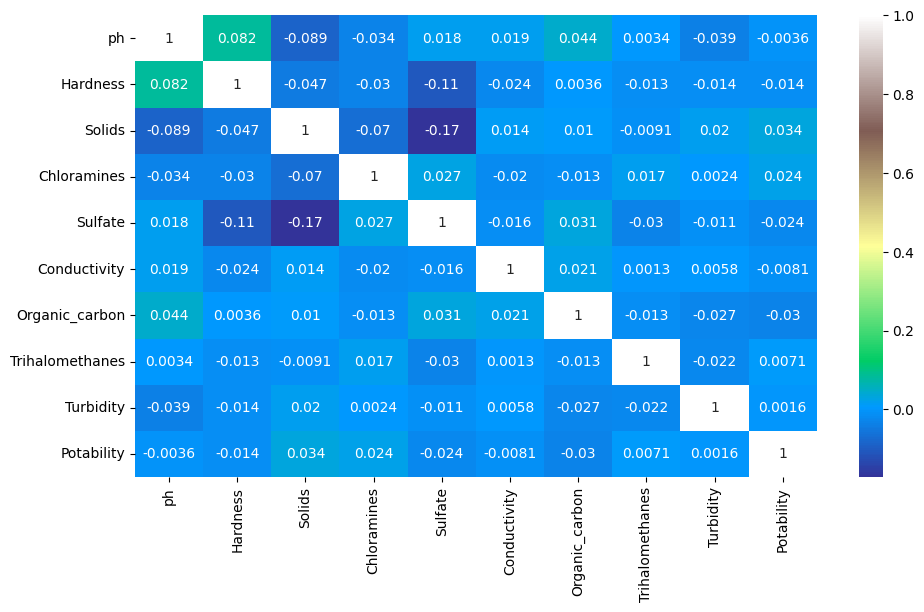

In [ ]:
sns.heatmap(water_data.corr(),annot=True, cmap='terrain')
fig=plt.gcf()
fig.set_size_inches(11,6)
plt.show()

lets check the outlier using box plot

<Axes: >

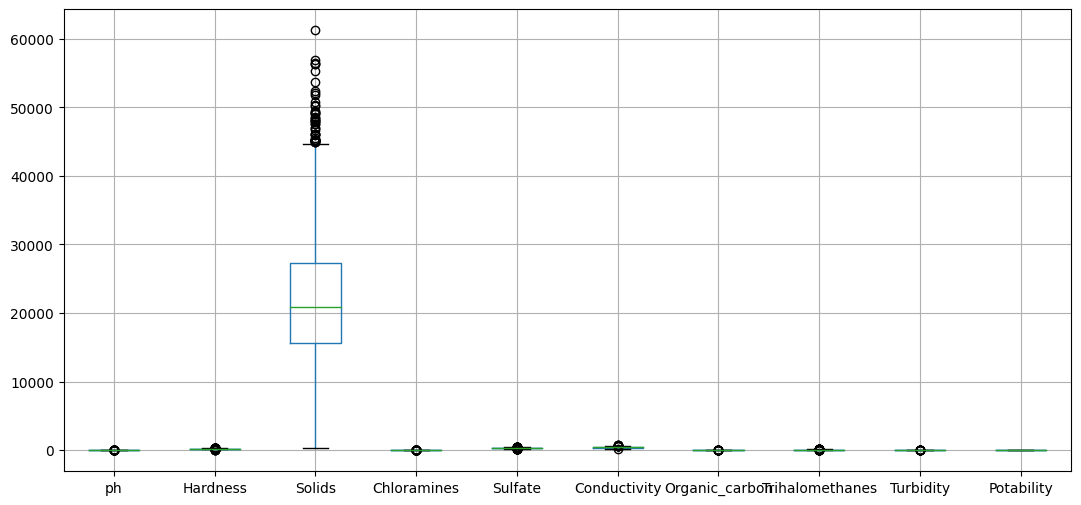

In [ ]:
water_data.boxplot(figsize=(13,6))

In [ ]:
water_data['Solids'].describe()

count     3276.000000
mean     22014.092526
std       8768.570828
min        320.942611
25%      15666.690297
50%      20927.833607
75%      27332.762127
max      61227.196008
Name: Solids, dtype: float64

In [ ]:
### not removing the outliers cuz they may be imp to decide the quality of water

In [ ]:
### lets do more EDA

0    1998
1    1278
Name: Potability, dtype: int64


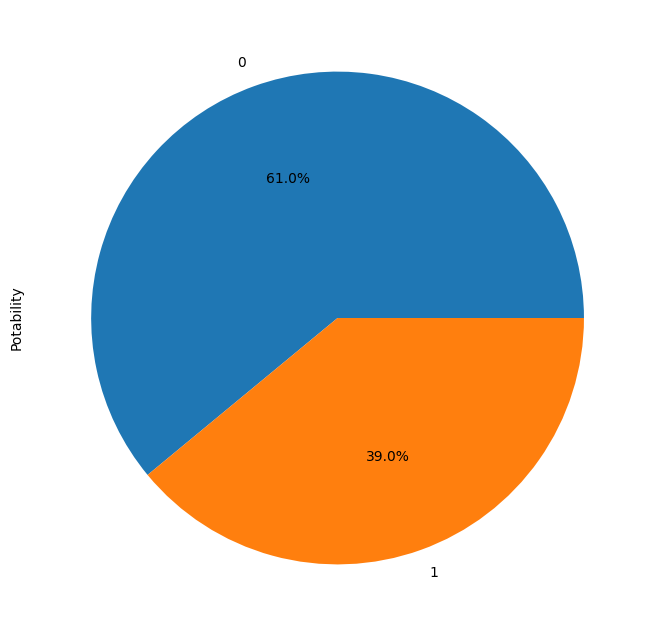

In [ ]:
print(water_data["Potability"].value_counts())
water_data["Potability"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

In [ ]:
water_data.shape

(3276, 10)

In [ ]:
water_data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

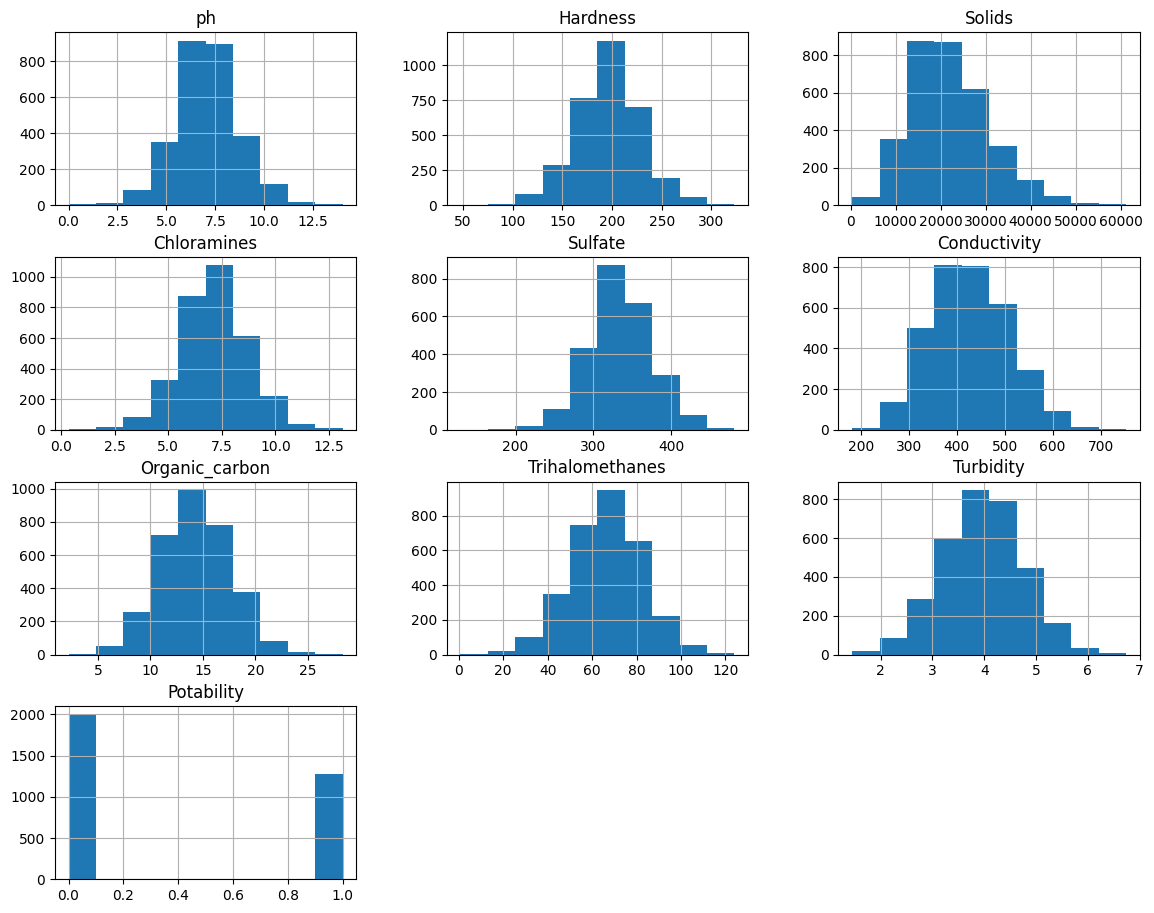

In [ ]:
water_data.hist(figsize=(14,11))
plt.show()

<Axes: xlabel='Hardness', ylabel='Potability'>

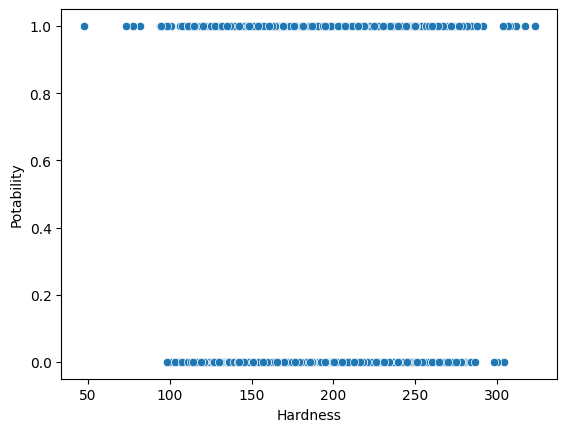

In [ ]:
sns.scatterplot(x=water_data['Hardness'], y=water_data['Potability'])

**DATA PREPROCESSING**

In [ ]:
X=water_data.drop('Potability' , axis=1)

In [ ]:
print(X)

In [ ]:
Y= water_data['Potability'].apply(lambda y_value: 1 if y_value>=7 else 0)

Partitioning

In [ ]:
X = water_data.drop('Potability',axis=1)

In [ ]:
Y= water_data['Potability']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

**knn**

In [ ]:
# Creating model object
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=25)

In [ ]:
# Training Model
model_kn.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
# Making Prediction
pred_kn = model_kn.predict(X_test)

In [ ]:
# Calculating Accuracy Score
kn = accuracy_score(Y_test, pred_kn)
print(kn)

0.5960365853658537


new code for rf delete kr **dena**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
class_counts = Y_train.value_counts()
class_weights = {0: class_counts[1] / class_counts[0], 1: 1.0}


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

In [ ]:
rf_classifier.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 63.41%


for random forest trees


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 60.37%


**End**

In [ ]:
print(  Y_test.shape)

(983,)


In [ ]:
Y_train.value_counts()

0    1395
1     898
Name: Potability, dtype: int64

**MODEL TRAINING**

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, Y_train)

RandomForestClassifier()

 accuracy on random forest

In [ ]:
from sklearn.metrics import accuracy_score
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

increased on changing random state from 101 to 42

In [ ]:
print('accuracy :', test_data_accuracy)

accuracy : 0.6093591047812817


accuracy on xgboost

In [ ]:
# Initialize the XGBoost model
model = xgb.XGBClassifier(
    n_estimators=400,  # Number of boosting rounds (you can adjust this)
    learning_rate=0.5,  # Adjust the learning rate
    max_depth=2,  # Maximum depth of trees (you can adjust this)
    random_state=42
)

# Train the model on the training data
model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions on the test data
Y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.6051829268292683


In [ ]:
# Save the trained model to a file
model.save_model('xgboost_model.model')

# Load the model for future predictions
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('xgboost_model.model')


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:35:11] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')
dt.fit(X_train,Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [ ]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(Y_test,prediction)*100
accuracy_dt

54.268292682926834

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, Y_test)))

Accuracy on training set: 0.897
Accuracy on test set: 0.543


logical regression

In [ ]:
logistic_regression_classifier = LogisticRegression()


In [ ]:
logistic_regression_classifier.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_regression_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.59
